## Libraries Import

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Download Pyspark libraries
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=750e8c9df6c25b58df081507008c5a1fa028e787320d932db43d61a53f7b6b8e
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package


# Data Analysis

## Preprocess the data

In [ ]:
# Read the data
data=pd.read_csv("insurance_2.csv")
data

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,male,49,28.3,NoDisease,1,1,Florence,54,1,0,FilmMaker,21082.2
14996,39.0,male,74,29.6,NoDisease,4,0,Miami,64,1,0,Student,7512.3
14997,20.0,male,62,33.3,NoDisease,0,0,Tampa,52,1,0,FashionDesigner,1391.5
14998,52.0,male,88,36.7,NoDisease,0,0,PanamaCity,70,1,0,Farmer,9144.6


In [ ]:
# Check all the null values
data.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [ ]:
# Replace all the null values with mean of their attribute
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Specify the columns with missing values that we want to impute
columns_with_missing_values = ['age', 'bmi']

# Apply the imputer to fill missing values with the mean
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])

data.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [ ]:
# Convert the Series to a dictionary and print the result
city_dict = data['city'].value_counts().to_dict()
city_dict

{'NewOrleans': 302,
 'Nashville': 302,
 'Charleston': 298,
 'Brimingham': 298,
 'Memphis': 297,
 'Louisville': 293,
 'Charlotte': 293,
 'Stamford': 280,
 'Newport': 280,
 'Harrisburg': 280,
 'Providence': 280,
 'Worcester': 279,
 'WashingtonDC': 275,
 'Atlanta': 274,
 'SanJose': 242,
 'Georgia': 237,
 'Houston': 237,
 'Raleigh': 237,
 'Oklahoma': 235,
 'LasVegas': 201,
 'Tucson': 201,
 'SanLuis': 201,
 'Kingman': 199,
 'Denver': 199,
 'Oxnard': 198,
 'SanDeigo': 198,
 'Oceanside': 198,
 'Carlsbad': 198,
 'Montrose': 198,
 'LosAngeles': 196,
 'Fresno': 175,
 'Reno': 175,
 'Pheonix': 173,
 'SantaFe': 173,
 'SilverCity': 173,
 'Mexicali': 173,
 'Bakersfield': 173,
 'Lovelock': 173,
 'Boston': 160,
 'NewYork': 160,
 'Phildelphia': 160,
 'Pittsburg': 160,
 'Prescott': 147,
 'Hartford': 136,
 'Portland': 136,
 'Cambridge': 136,
 'Springfield': 136,
 'Buffalo': 134,
 'AtlanticCity': 134,
 'Columbus': 131,
 'Rochester': 131,
 'Miami': 122,
 'Kingsport': 122,
 'PanamaCity': 122,
 'Florence': 12

In [ ]:
# Add state information for each city

state_city_map = {
    "Alabama": ["Brimingham", "Huntsville"],
    "Alaska": [],
    "Arizona": ["Tucson", "Kingman", "Pheonix", "Prescott"],
    "Arkansas": [],
    "California": ["SanJose", "SanFrancisco", "SanLuis", "Oxnard", "SanDeigo", "Oceanside", "Carlsbad", "LosAngeles", "Fresno", "Mexicali", "Bakersfield", "SantaRosa", "Bloomington", "Eureka"],
    "Colorado": ["Denver", "Montrose"],
    "Connecticut": ["Stamford", "Hartford"],
    "Delaware": [],
    "Florida": ["Miami", "PanamaCity", "Tampa", "Orlando"],
    "Georgia": ["Atlanta", "Georgia", "Macon"],
    "Hawaii": [],
    "Idaho": [],
    "Illinois": ["Chicago", "Springfield"],
    "Indiana": ["Indianapolis"],
    "Iowa": ["IowaCity", "Waterloo"],
    "Kansas": ["Salina"],
    "Kentucky": ["Louisville", ],
    "Louisiana": ["NewOrleans"],
    "Maine": [],
    "Maryland": ["Baltimore"],
    "Massachusetts": ["Worcester", "Boston", "Cambridge"],
    "Michigan": ["Escabana"],
    "Minnesota": ["Minneapolis"],
    "Mississippi": [],
    "Missouri": ["Marshall", "KanasCity", "JeffersonCity"],
    "Montana": [],
    "Nebraska": ["FallsCity", "Lincoln"],
    "Nevada": ["LasVegas", "Reno", "Lovelock"],
    "New Hampshire": [],
    "New Jersey": ["AtlanticCity", "Trenton"],
    "New Mexico": ["SantaFe", "SilverCity"],
    "New York": ["NewYork", "Buffalo", "Rochester", "Columbia", "Warwick", "Syracuse"],
    "North Carolina": ["Charlotte", "Raleigh"],
    "North Dakota": ["Fargo", "Mandan", "Minot", "GrandForks"],
    "Ohio": ["Cleveland", "Columbus", "Canton", "Cincinnati", "Youngstown"],
    "Oklahoma": ["Oklahoma"],
    "Oregon": ["Portland"],
    "Pennsylvania": ["Harrisburg", "Pittsburg", "Phildelphia", "York"],
    "Rhode Island": ["Newport", "Providence"],
    "South Carolina": ["Charleston", "Florence"],
    "South Dakota": ["Brookings"],
    "Tennessee": ["Memphis", "Nashville", "Kingsport", "Knoxville"],
    "Texas": ["Houston"],
    "Utah": [],
    "Vermont": [],
    "Virginia": [],
    "Washington": ["WashingtonDC"],
    "West Virginia": [],
    "Wisconsin": [],
    "Wyoming": []
}

# Function to map city to state
def map_city_to_state(city):
    for state, cities in state_city_map.items():
        if city in cities:
            return state
    return None  # Return None if city is not found in the map

# Add a new 'state' column to the dataset based on the 'city' column
data['state'] = data['city'].apply(map_city_to_state)
data.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
state                  0
dtype: int64

In [ ]:
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,state
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,New York
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,Massachusetts
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,Pennsylvania
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,Pennsylvania
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,New York


## Plot

Text(0.5, 1.0, 'Distribution of Charges')

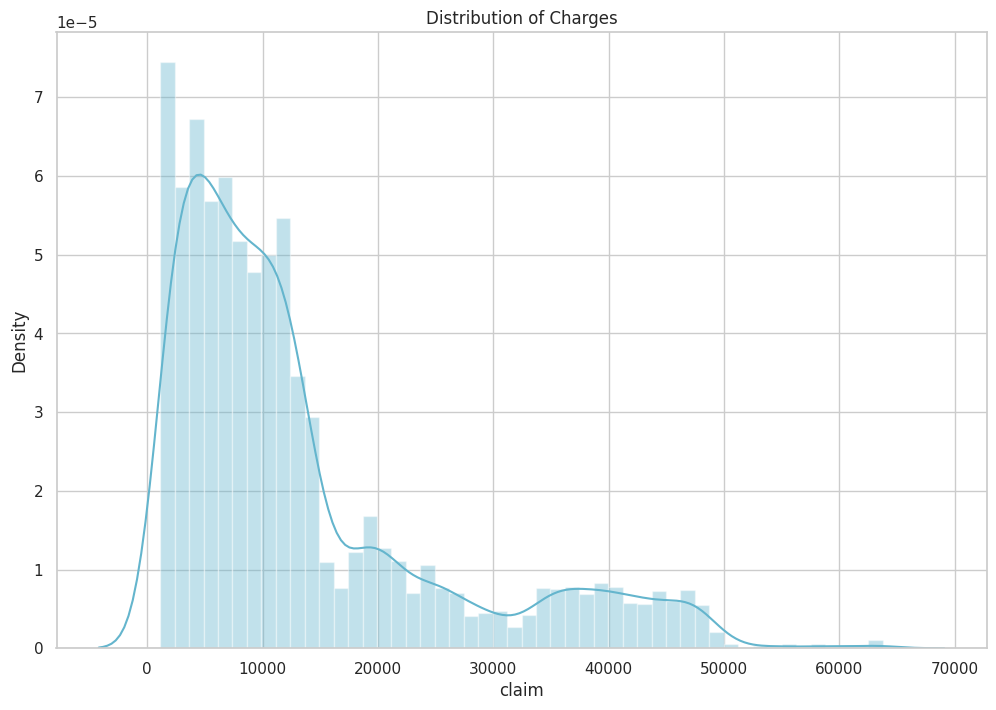

In [ ]:
# visualize the distribution of charges
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['claim'], kde = True, color = 'c')
plt.title('Distribution of Charges')

Main distribution of density is among claim of 10000 to 20000, and another small main distribution is among 40000 to 500000

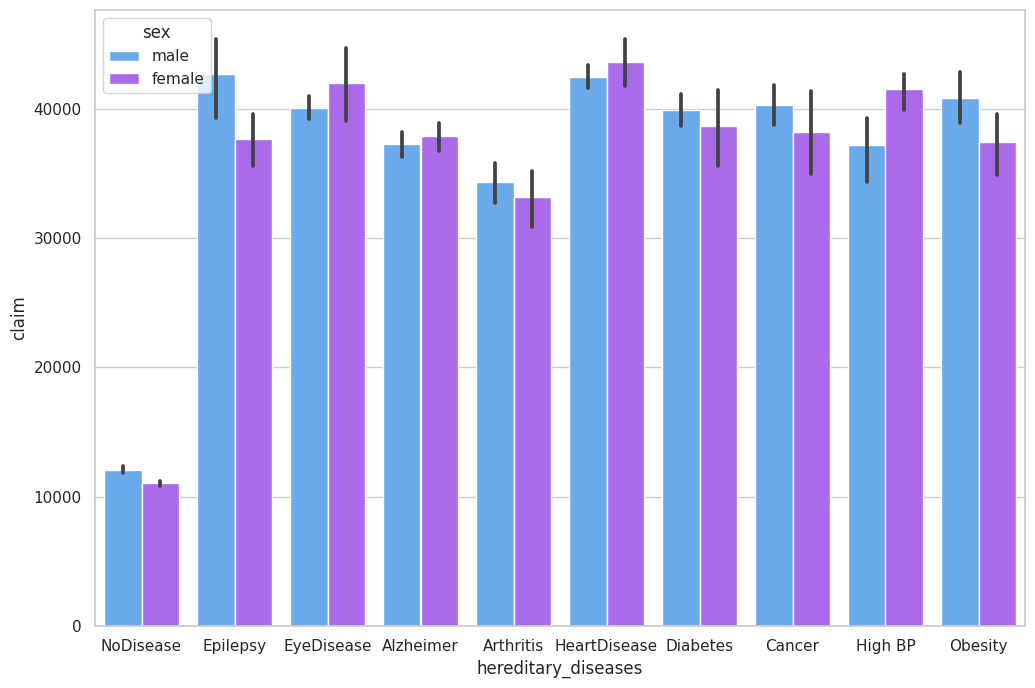

In [ ]:
# visualize claims and gender with different diseases
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='hereditary_diseases', y='claim', hue='sex', data=data, palette='cool')

The significant influence is between NoDisease and Dissease.
No claim of no disease is around 10000, when there's a disease, claims are mostly in the range of 30000 to 40000 for any kinds of disease.

When there is disease, there's no clear difference between male and female for all kinds of disease.

From this graph, with disease, and without disease dominant the difference.

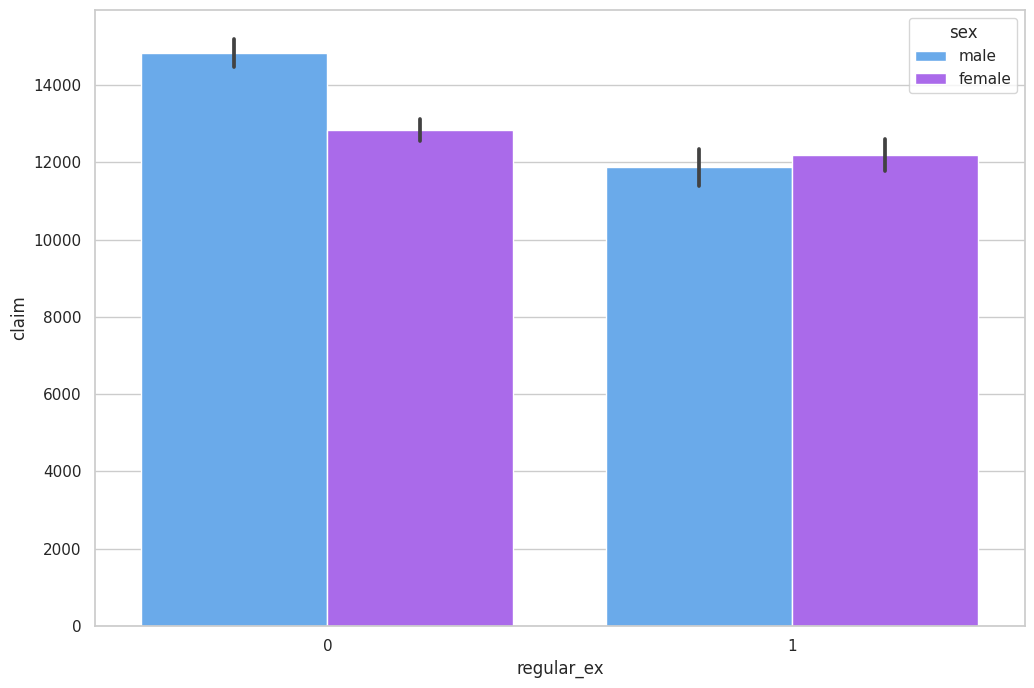

In [ ]:
# visualize claims and gender with different diseases
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='regular_ex', y='claim', hue='sex', data=data, palette='cool')

No significant difference between regular excercise and no-regular excercises. Claims are both around 12000 to 14000. Neither clear difference with influence of sex for both regular excercise and no regular excercise.

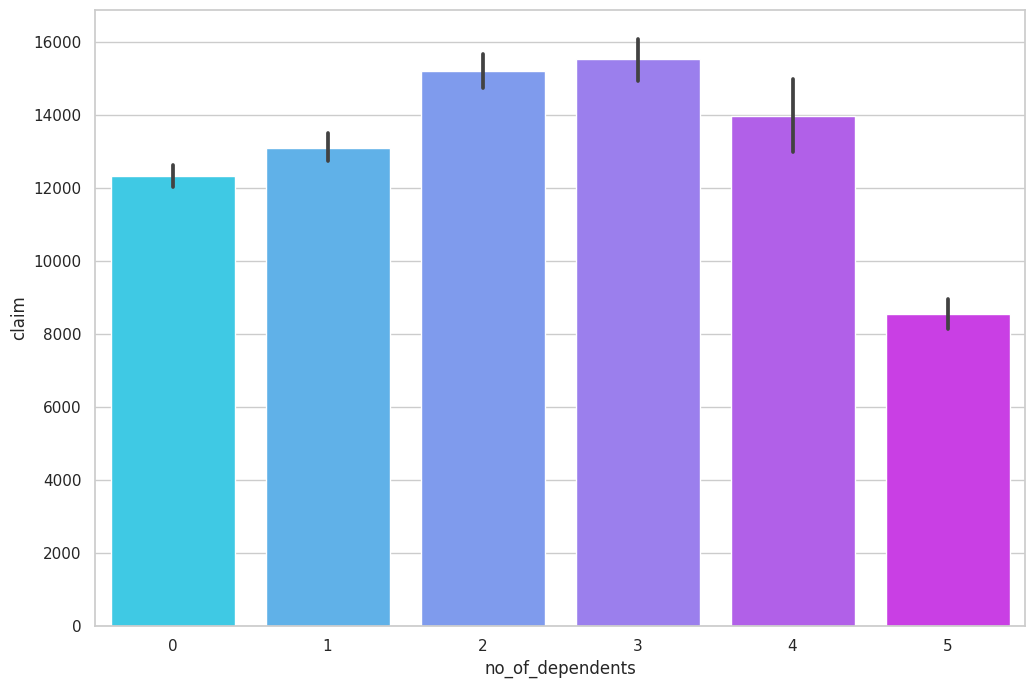

In [ ]:
# visualize claims and gender with different diseases
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='no_of_dependents', y='claim', data=data, palette='cool')

Claims for number of dependents are in a similar range 12000 to about 15000, but when the dependent is 5, there's a significant drop to about 8000.

In [ ]:
# Print the count
print(f"Number of dependents with '5': {len(data[data['no_of_dependents'] == 5])}")

Number of dependents with '5': 243


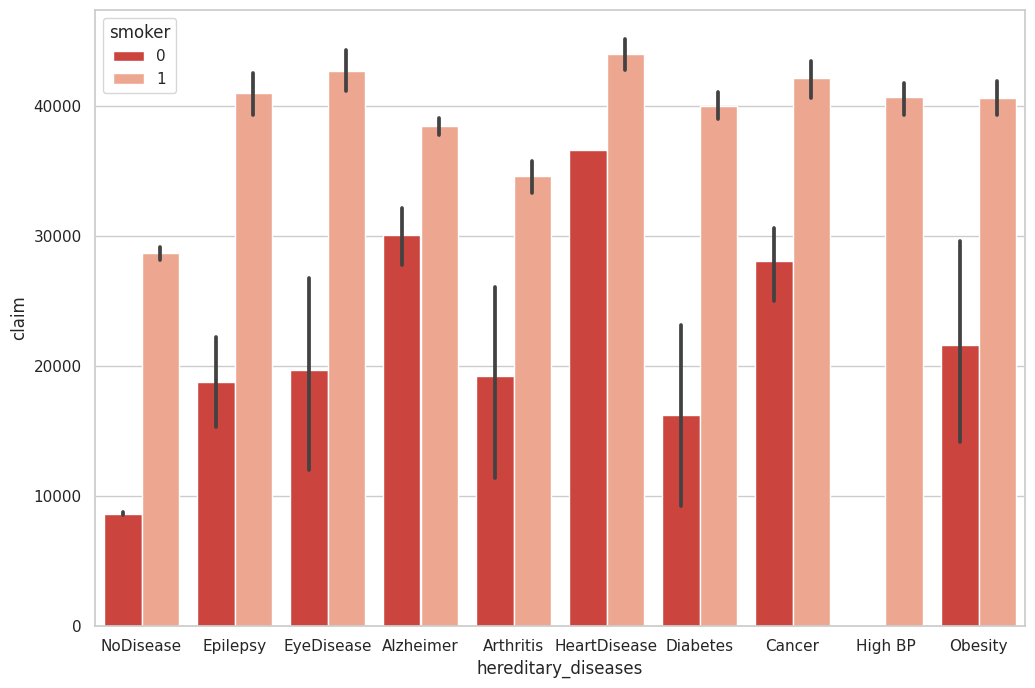

In [ ]:
# visualize claims with smokers with different diseases
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'hereditary_diseases', y = 'claim',
                 hue='smoker', data=data, palette='Reds_r')

For both with disease and no disease, smoke or not gives a big difference on the claim.

No disease and do not smoke claim is about 10000, while for smoker, it's approaching 30000.

For people with disease, in each type of disease, smoker has a higher claim than no smoker, for example, Diabetes no smoker is about 15000 and smoker is 40000.

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='hereditary_diseases', y='claim', hue='no_of_dependents', data=data, palette='Set1')

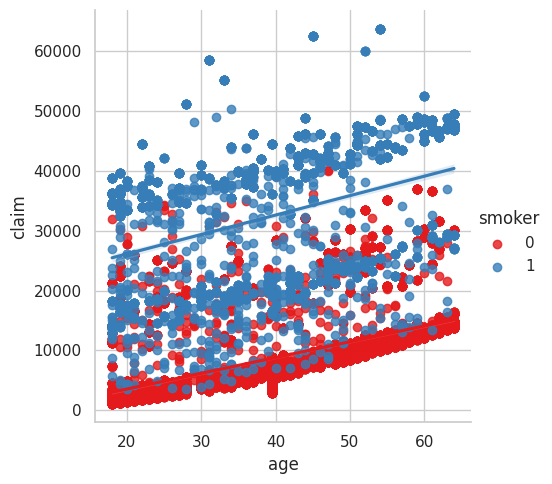

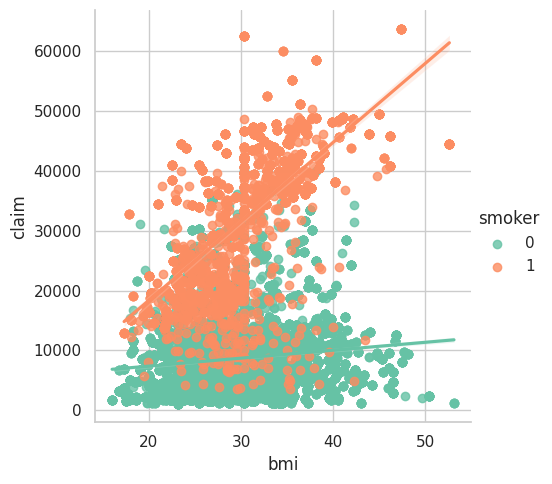

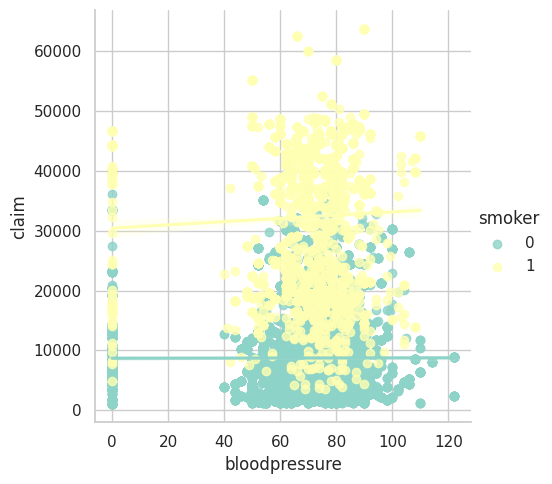

In [ ]:
ax = sns.lmplot(x = 'age', y = 'claim', data=data, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'claim', data=data, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'bloodpressure', y = 'claim', data=data, hue='smoker', palette='Set3')

In the graph age vs claim, there's an ascending trend of claim when increasing age. Both smoker and no smoker shows the trend that increase the claim with increasing ages.

In the graph bmi vs claim, for no smoker, there is a slight increasing trend higher claim with higher bmi, and clear increasing trend for smoker higher bmi to get higher claim.

In the graph bloodpressure vs claim, for both smoker and non smoker has almost no gradient of claim with increasing bloodpressure. It only differs smoker pays higher claim than non-smoker.

In [ ]:
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,state
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,New York
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,Massachusetts
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,Pennsylvania
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,Pennsylvania
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,New York


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Specify the columns with missing values or zeros that we want to impute
columns_with_zeros = ['bloodpressure']

# Replace 0 values with NaN to treat them as missing values
data[columns_with_zeros] = data[columns_with_zeros].replace(0)

# Apply the imputer to fill missing values (including former 0 values) with the mean
data[columns_with_zeros] = imputer.fit_transform(data[columns_with_zeros])

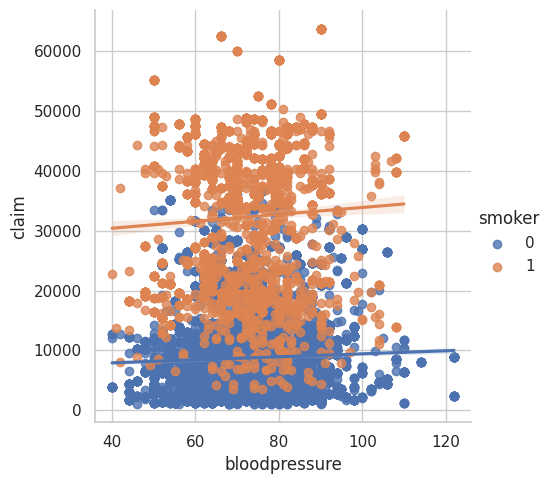

In [ ]:
ax = sns.lmplot(x = 'bloodpressure', y = 'claim', data=data, hue='smoker')

After cleaning the noise of data, keep the valid data for bloodpressure vs claim, it still shows that there is only very slight increase of claim by increasing bloodpressure.

## Apply K-means

### Age vs Claim

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


#### With Smokers

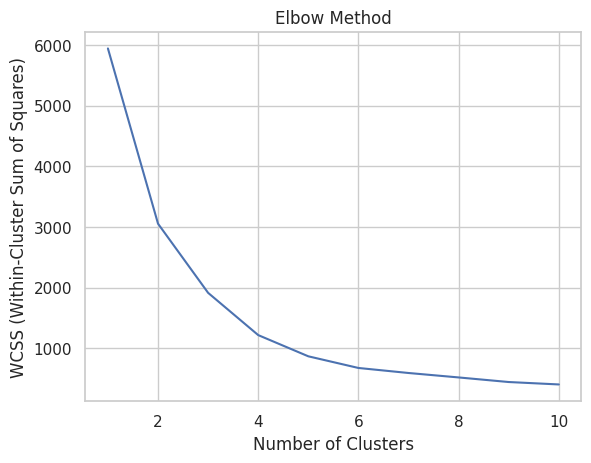

In [ ]:
# Generate synthetic customer data
np.random.seed(0)

# Create a DataFrame from the synthetic data
data_k_means = data[data['smoker'] == 1][['age', 'claim']]

# Standardize the data (important for k-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_k_means)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Based on the elbow graph, the approriate number of clusters is 3

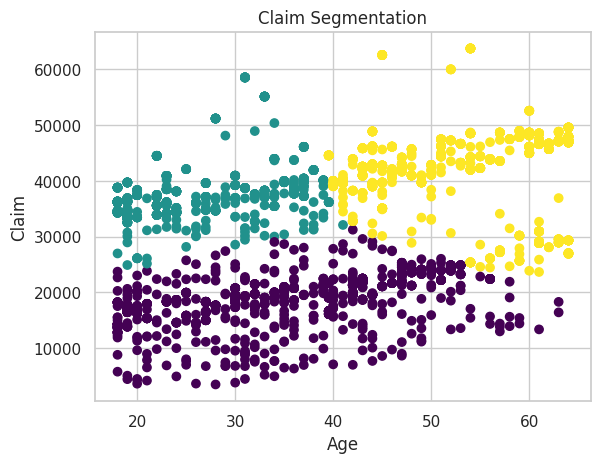

Cluster Centers:
         age         claim
0  35.107723  18762.972595
1  26.938741  37733.389506
2  52.283647  42227.061415

Segment 0:
               age         claim  Cluster
count  1102.000000   1102.000000   1102.0
mean     35.107723  18762.972595      0.0
std      10.995693   4408.699672      0.0
min      18.000000   3480.800000      0.0
25%      26.000000  16547.575000      0.0
50%      35.000000  19199.900000      0.0
75%      43.000000  21771.300000      0.0
max      63.000000  31245.800000      0.0

Segment 1:
              age         claim  Cluster
count  810.000000    810.000000    810.0
mean    26.938741  37733.389506      1.0
std      6.880625   4871.438829      0.0
min     18.000000  24908.500000      1.0
25%     20.000000  34779.600000      1.0
50%     25.500000  37133.900000      1.0
75%     33.750000  39611.800000      1.0
max     41.000000  58571.100000      1.0

Segment 2:
               age         claim  Cluster
count  1060.000000   1060.000000   1060.0
mean    

In [ ]:
# Based on the elbow method, choose an appropriate number of clusters
n_clusters = 3

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=400, n_init=10, random_state=0)
kmeans.fit(df_scaled)

# Add cluster labels to the DataFrame
data_k_means['Cluster'] = kmeans.labels_

# Visualize the customer segments
plt.scatter(data_k_means['age'], data_k_means['claim'], c=data_k_means['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Claim')
plt.title('Claim Segmentation')
plt.show()

# Print cluster centers (centroids)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=data_k_means.columns[:-1]))

# Analyze and interpret the customer segments
for i in range(n_clusters):
    segment = data_k_means[data_k_means['Cluster'] == i]
    print(f"\nSegment {i}:")
    print(segment.describe())

#### Without Smokers

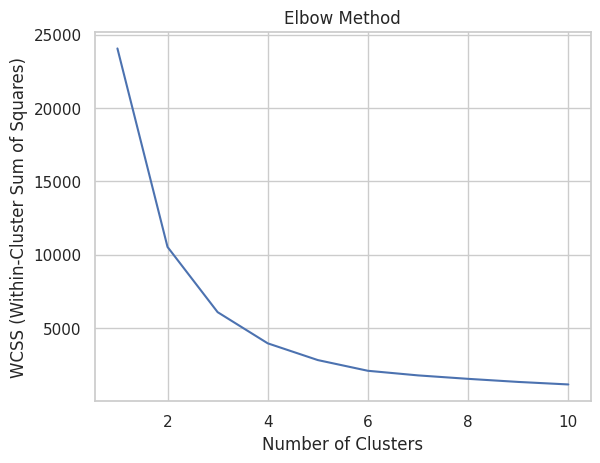

In [ ]:
# Generate synthetic customer data
np.random.seed(0)

# Create a DataFrame from the synthetic data
data_k_means = data[data['smoker'] == 0][['age', 'claim']]

# Standardize the data (important for k-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_k_means)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

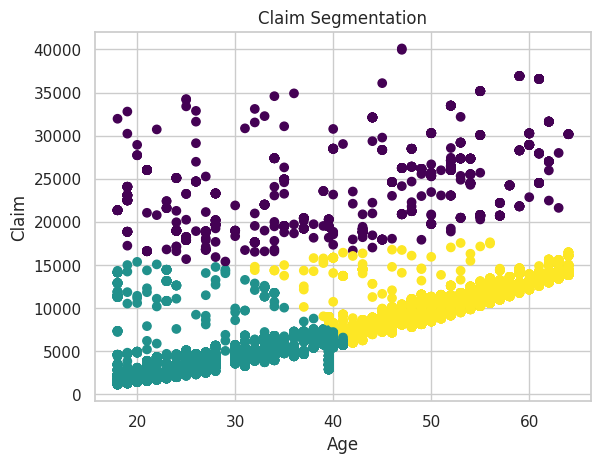

Cluster Centers:
         age         claim
0  41.897096  24079.191714
1  28.083221   4221.945807
2  51.873383  10576.792691

Segment 0:
               age         claim  Cluster
count  1050.000000   1050.000000   1050.0
mean     41.897096  24079.191714      0.0
std      13.802232   4975.159210      0.0
min      18.000000  15385.800000      0.0
25%      28.000000  19673.300000      0.0
50%      45.000000  23563.000000      0.0
75%      54.000000  27322.700000      0.0
max      64.000000  40114.800000      0.0

Segment 1:
               age         claim  Cluster
count  5724.000000   5724.000000   5724.0
mean     28.083221   4221.945807      1.0
std       7.422735   2270.838573      0.0
min      18.000000   1121.900000      1.0
25%      21.000000   2426.675000      1.0
50%      28.000000   4074.500000      1.0
75%      35.000000   5383.500000      1.0
max      41.000000  15347.400000      1.0

Segment 2:
               age         claim  Cluster
count  5254.000000   5254.000000   5254.0

In [ ]:
# Based on the elbow method, choose an appropriate number of clusters
n_clusters = 3

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=400, n_init=10, random_state=0)
kmeans.fit(df_scaled)

# Add cluster labels to the DataFrame
data_k_means['Cluster'] = kmeans.labels_

# Visualize the customer segments
plt.scatter(data_k_means['age'], data_k_means['claim'], c=data_k_means['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Claim')
plt.title('Claim Segmentation')
plt.show()

# Print cluster centers (centroids)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=data_k_means.columns[:-1]))

# Analyze and interpret the customer segments
for i in range(n_clusters):
    segment = data_k_means[data_k_means['Cluster'] == i]
    print(f"\nSegment {i}:")
    print(segment.describe())

### BMI vs Claim


#### With Smokers

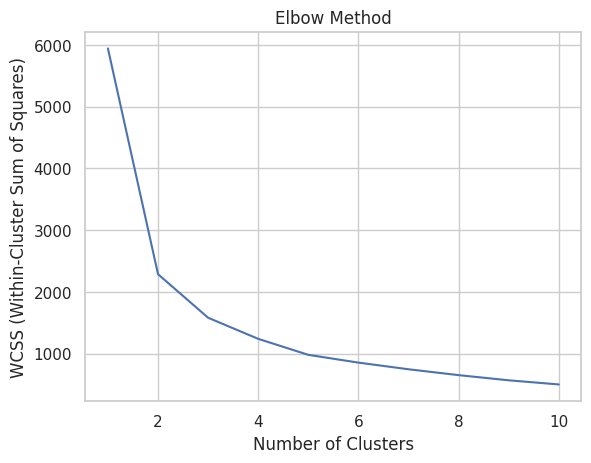

In [ ]:
# Generate synthetic customer data
np.random.seed(0)

# Create a DataFrame from the synthetic data
data_k_means = data[data['smoker'] == 1][['bmi', 'claim']]

# Standardize the data (important for k-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_k_means)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

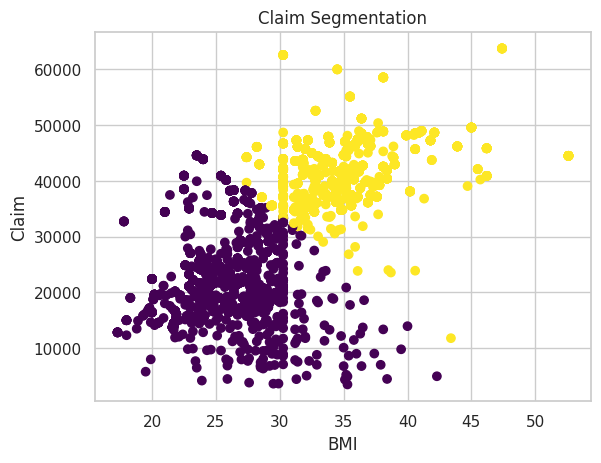

Cluster Centers:
         bmi         claim
0  26.181405  22967.363223
1  35.217212  42327.114027

Segment 0:
               bmi         claim  Cluster
count  1526.000000   1526.000000   1526.0
mean     26.146605  22877.841809      0.0
std       3.310731   8051.965068      0.0
min      17.300000   3480.800000      0.0
25%      24.000000  17748.500000      0.0
50%      26.400000  21167.000000      0.0
75%      28.375000  27335.325000      0.0
max      42.300000  44585.500000      0.0

Segment 1:
               bmi         claim  Cluster
count  1446.000000   1446.000000   1446.0
mean     35.172702  42247.537898      1.0
std       4.395845   5732.315713      0.0
min      27.400000  11784.200000      1.0
25%      31.900000  37742.600000      1.0
50%      34.800000  42055.600000      1.0
75%      36.900000  46151.100000      1.0
max      52.600000  63770.400000      1.0


In [ ]:
# Based on the elbow method, choose an appropriate number of clusters
n_clusters = 2

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=400, n_init=10, random_state=0)
kmeans.fit(df_scaled)

# Add cluster labels to the DataFrame
data_k_means['Cluster'] = kmeans.labels_

# Visualize the customer segments
plt.scatter(data_k_means['bmi'], data_k_means['claim'], c=data_k_means['Cluster'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.title('Claim Segmentation')
plt.show()

# Print cluster centers (centroids)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=data_k_means.columns[:-1]))

# Analyze and interpret the customer segments
for i in range(n_clusters):
    segment = data_k_means[data_k_means['Cluster'] == i]
    print(f"\nSegment {i}:")
    print(segment.describe())

#### Without Smokers

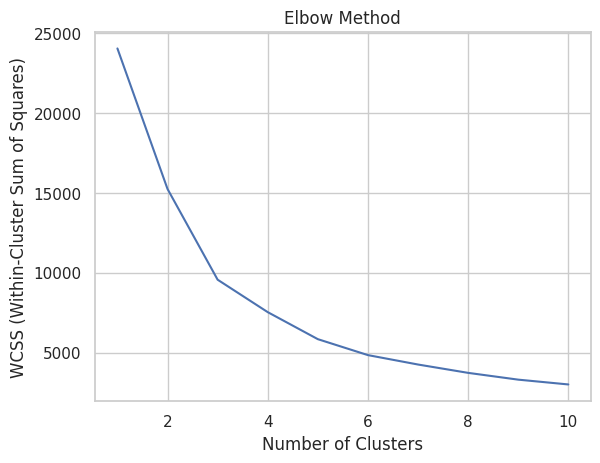

In [ ]:
# Generate synthetic customer data
np.random.seed(0)

# Create a DataFrame from the synthetic data
data_k_means = data[data['smoker'] == 0][['bmi', 'claim']]

# Standardize the data (important for k-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_k_means)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

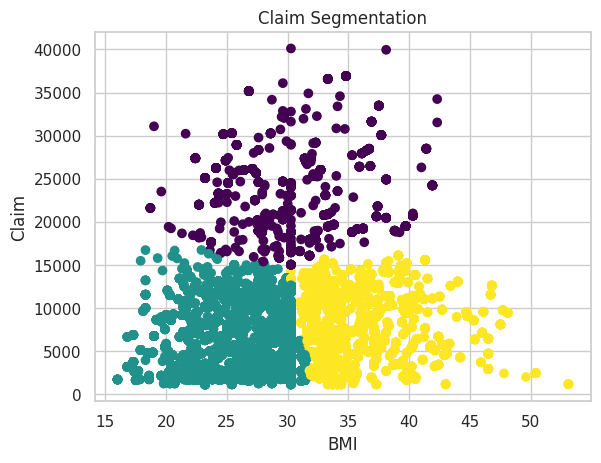

Cluster Centers:
         bmi         claim
0  30.967703  23692.353448
1  26.173087   6582.739645
2  36.016388   8177.093064

Segment 0:
               bmi         claim  Cluster
count  1102.000000   1102.000000   1102.0
mean     30.967703  23692.353448      0.0
std       4.962415   5160.370938      0.0
min      18.700000  15019.800000      0.0
25%      27.400000  19442.400000      0.0
50%      30.266413  23083.000000      0.0
75%      34.100000  27322.700000      0.0
max      42.300000  40114.800000      0.0

Segment 1:
               bmi         claim  Cluster
count  6543.000000   6543.000000   6543.0
mean     26.173087   6582.739645      1.0
std       3.370959   3745.049101      0.0
min      16.000000   1121.900000      1.0
25%      23.900000   3260.200000      1.0
50%      26.600000   6123.600000      1.0
75%      28.900000   9620.300000      1.0
max      31.700000  16727.000000      1.0

Segment 2:
               bmi         claim  Cluster
count  4383.000000   4383.000000   4383.0

In [ ]:
# Based on the elbow method, choose an appropriate number of clusters
n_clusters = 3

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=400, n_init=10, random_state=0)
kmeans.fit(df_scaled)

# Add cluster labels to the DataFrame
data_k_means['Cluster'] = kmeans.labels_

# Visualize the customer segments
plt.scatter(data_k_means['bmi'], data_k_means['claim'], c=data_k_means['Cluster'], cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.title('Claim Segmentation')
plt.show()

# Print cluster centers (centroids)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=data_k_means.columns[:-1]))

# Analyze and interpret the customer segments
for i in range(n_clusters):
    segment = data_k_means[data_k_means['Cluster'] == i]
    print(f"\nSegment {i}:")
    print(segment.describe())

### Blood Pressure vs Claim

#### With Smokers

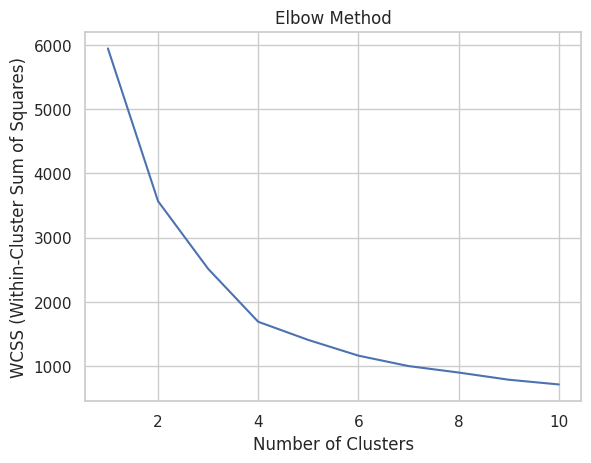

In [ ]:
# Generate synthetic customer data
np.random.seed(0)

# Create a DataFrame from the synthetic data
data_k_means = data[data['smoker'] == 1][['bloodpressure', 'claim']]

# Standardize the data (important for k-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_k_means)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

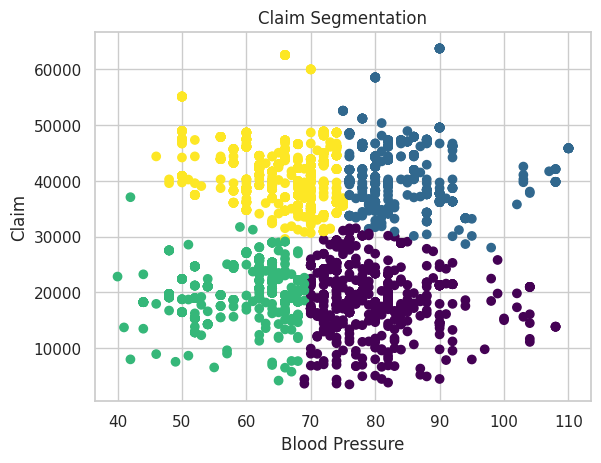

Cluster Centers:
   bloodpressure         claim
0      79.328823  19320.808796
1      83.940845  41755.855211
2      59.047337  20537.979684
3      66.114173  41007.909252

Segment 0:
       bloodpressure         claim  Cluster
count     739.000000    739.000000    739.0
mean       79.328823  19320.808796      0.0
std         7.437645   5377.585046      0.0
min        69.000000   3480.800000      0.0
25%        74.000000  16517.200000      0.0
50%        78.000000  19444.300000      0.0
75%        84.000000  22410.850000      0.0
max       108.000000  31512.500000      0.0

Segment 1:
       bloodpressure         claim  Cluster
count     710.000000    710.000000    710.0
mean       83.940845  41755.855211      1.0
std         7.237412   6096.079273      0.0
min        75.000000  28030.100000      1.0
25%        78.000000  37165.200000      1.0
50%        82.000000  40826.500000      1.0
75%        88.000000  46201.000000      1.0
max       110.000000  63770.400000      1.0

Segment 2:


In [ ]:
# Based on the elbow method, choose an appropriate number of clusters
n_clusters = 4

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=400, n_init=10, random_state=0)
kmeans.fit(df_scaled)

# Add cluster labels to the DataFrame
data_k_means['Cluster'] = kmeans.labels_

# Visualize the customer segments
plt.scatter(data_k_means['bloodpressure'], data_k_means['claim'], c=data_k_means['Cluster'], cmap='viridis')
plt.xlabel('Blood Pressure')
plt.ylabel('Claim')
plt.title('Claim Segmentation')
plt.show()

# Print cluster centers (centroids)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=data_k_means.columns[:-1]))

# Analyze and interpret the customer segments
for i in range(n_clusters):
    segment = data_k_means[data_k_means['Cluster'] == i]
    print(f"\nSegment {i}:")
    print(segment.describe())

#### Without Smokers

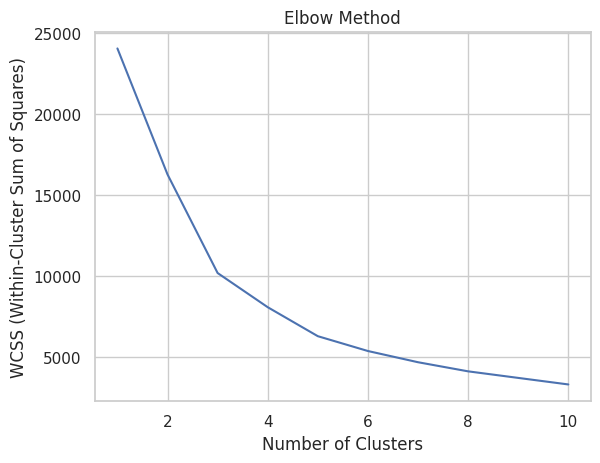

In [ ]:
# Generate synthetic customer data
np.random.seed(0)

# Create a DataFrame from the synthetic data
data_k_means = data[data['smoker'] == 0][['bloodpressure', 'claim']]

# Standardize the data (important for k-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_k_means)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method results to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

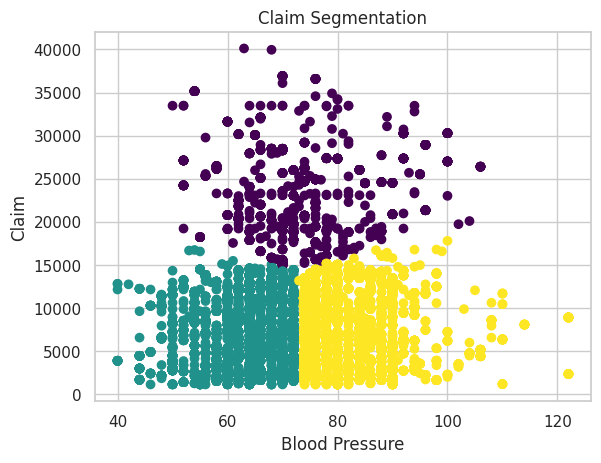

Cluster Centers:
   bloodpressure         claim
0      73.295652  23339.999304
1      63.659480   7045.939151
2      81.952920   7350.530453

Segment 0:
       bloodpressure         claim  Cluster
count    1150.000000   1150.000000   1150.0
mean       73.295652  23339.999304      0.0
std        11.224719   5325.587683      0.0
min        50.000000  14988.400000      0.0
25%        66.000000  18963.200000      0.0
50%        72.000000  22493.700000      0.0
75%        78.000000  27118.000000      0.0
max       106.000000  40114.800000      0.0

Segment 1:
       bloodpressure         claim  Cluster
count    5844.000000   5844.000000   5844.0
mean       63.659480   7045.939151      1.0
std         6.558657   3805.794187      0.0
min        40.000000   1121.900000      1.0
25%        60.000000   3861.200000      1.0
50%        64.000000   6710.200000      1.0
75%        68.000000  10370.900000      1.0
max        72.000000  16727.000000      1.0

Segment 2:
       bloodpressure         cl

In [ ]:
# Based on the elbow method, choose an appropriate number of clusters
n_clusters = 3

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=400, n_init=10, random_state=0)
kmeans.fit(df_scaled)

# Add cluster labels to the DataFrame
data_k_means['Cluster'] = kmeans.labels_

# Visualize the customer segments
plt.scatter(data_k_means['bloodpressure'], data_k_means['claim'], c=data_k_means['Cluster'], cmap='viridis')
plt.xlabel('Blood Pressure')
plt.ylabel('Claim')
plt.title('Claim Segmentation')
plt.show()

# Print cluster centers (centroids)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=data_k_means.columns[:-1]))

# Analyze and interpret the customer segments
for i in range(n_clusters):
    segment = data_k_means[data_k_means['Cluster'] == i]
    print(f"\nSegment {i}:")
    print(segment.describe())

## Apply Map Reduce


In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark
spark = SparkSession.builder.master("local").appName("HighestClaimByJobTitle").getOrCreate()

# Create an RDD with the provided data
data_pyspark = spark.createDataFrame(data)

### Job vs Claim

In [ ]:
# Map the data to key-value pairs with job_title as the key and claim as the value
job_claim_pairs = data_pyspark.rdd.map(lambda x: (x['job_title'], x['claim']))

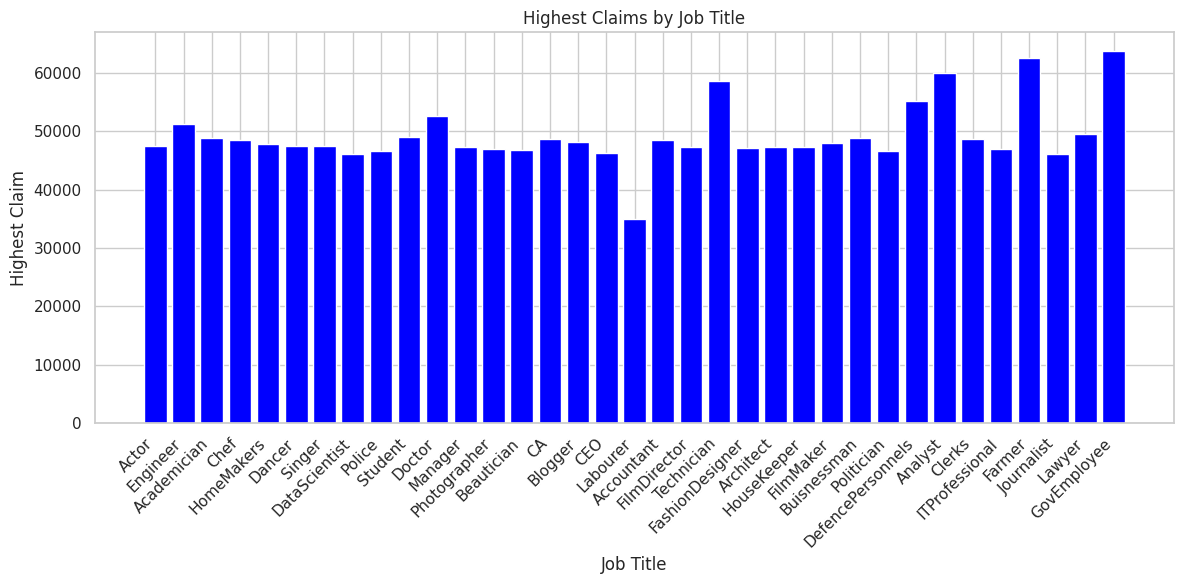

In [ ]:
# Reduce by key to find the maximum claim for each job title
max_claim_by_job = job_claim_pairs.reduceByKey(lambda a, b: max(a, b))

# Filter out the results to keep only the highest claims
filtered_max_claims = max_claim_by_job.filter(lambda x: x[1] > 0)

# Collect and print the result
result = filtered_max_claims.collect()

# Plot the result
# Extract job titles and claims from the result
job_titles, claims = zip(*result)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(job_titles, claims, color='blue')
plt.xlabel('Job Title')
plt.ylabel('Highest Claim')
plt.title('Highest Claims by Job Title')
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.tight_layout()

# Show the plot
plt.show()

From the highest claims by job title, there is no big differences for the highest claim among different types of jobs. For majority of the jobs, the highest claim are about 50000

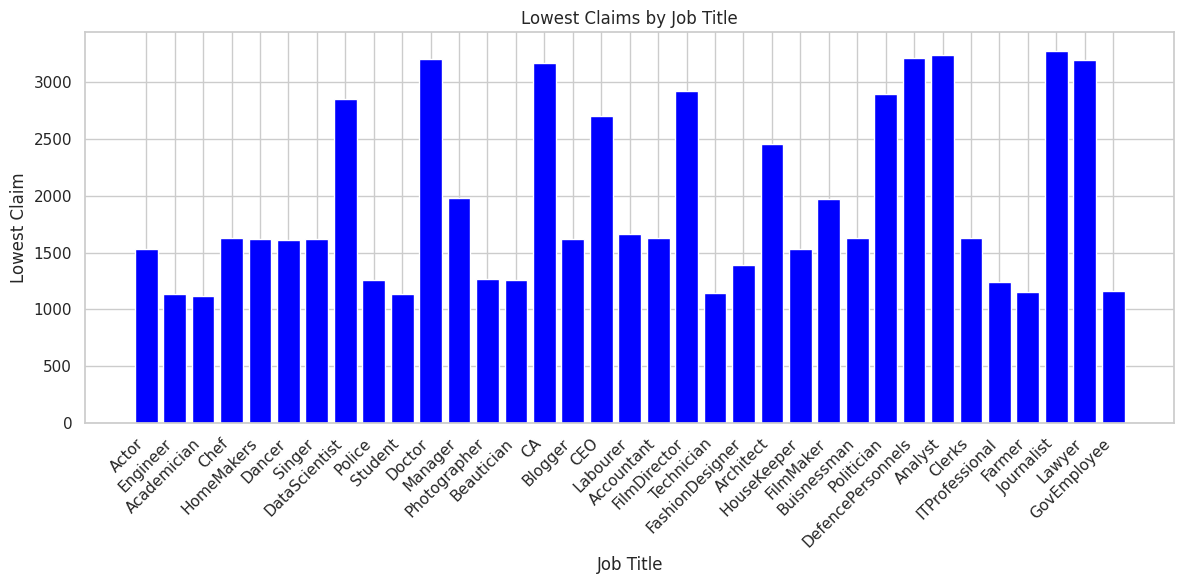

In [ ]:
# Reduce by key to find the minimum claim for each job title
min_claim_by_job = job_claim_pairs.reduceByKey(lambda a, b: min(a, b))

# Filter out the results to keep only the lowest claims
filtered_min_claims = min_claim_by_job.filter(lambda x: x[1] > 0)

# Collect and print the result
result = filtered_min_claims.collect()

# Plot the result
# Extract job titles and claims from the result
job_titles, claims = zip(*result)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(job_titles, claims, color='blue')
plt.xlabel('Job Title')
plt.ylabel('Lowest Claim')
plt.title('Lowest Claims by Job Title')
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.tight_layout()

# Show the plot
plt.show()

In the lowest claims by job title, the lowest claims differ from each other for different jobs. For students and engineer, the lowest claim is around 1200, and for journalist and lawyer are 3500.

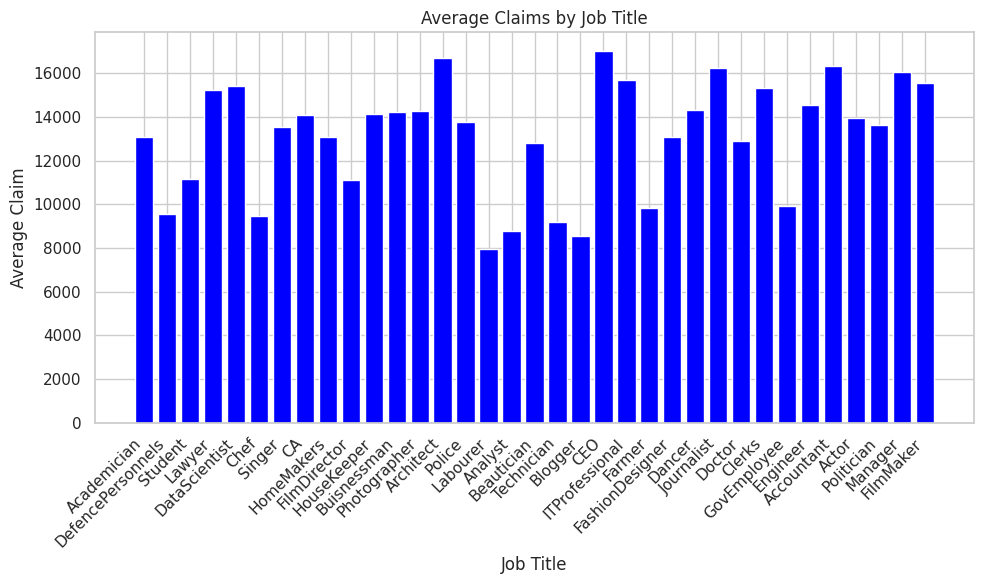

In [ ]:
# Calculate average claims by job title
avg_claims_by_job = data_pyspark.groupBy("job_title").agg({"claim": "avg"})

# Convert the PySpark DataFrame to a pandas DataFrame
avg_claims_df = avg_claims_by_job.toPandas()

# Extract job titles and average claims from the pandas DataFrame
job_titles = avg_claims_df["job_title"]
average_claims = avg_claims_df["avg(claim)"]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(job_titles, average_claims, color='blue')
plt.xlabel('Job Title')
plt.ylabel('Average Claim')
plt.title('Average Claims by Job Title')
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.tight_layout()

# Show the plot
plt.show()

From the average claims by job title, it shows different job types have varies of average claim. Analyst has average claims of 8000, and Police have average claims of more than 16000. It shows that job types influences the claims of insurance.

### State vs Claim

In [ ]:
# Map the data to key-value pairs with state as the key and claim as the value
state_claim_pairs = data_pyspark.rdd.map(lambda x: (x['state'], x['claim']))

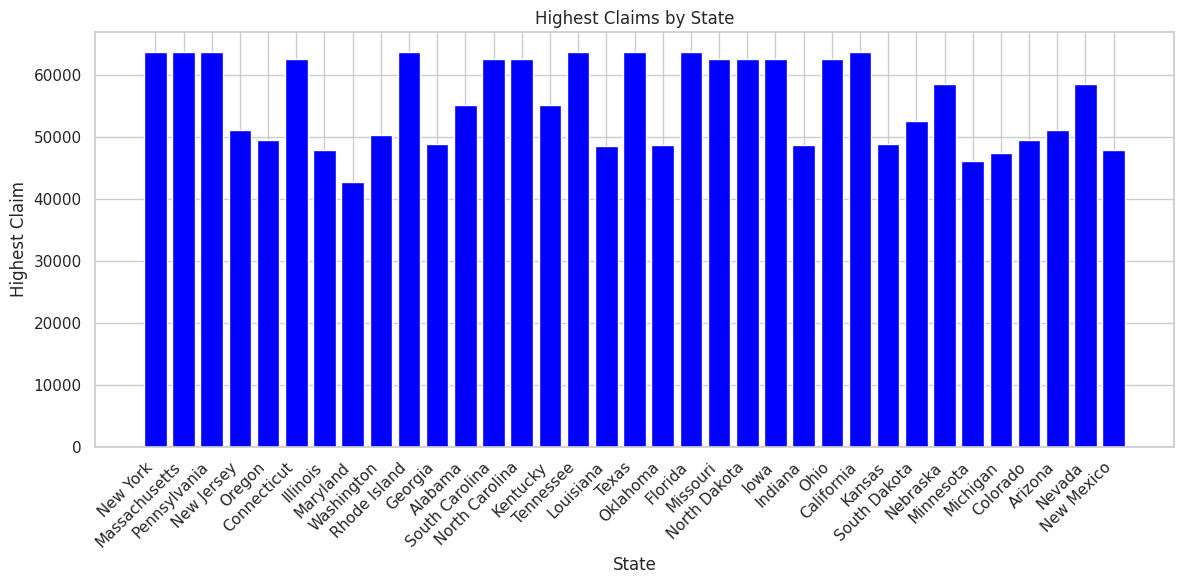

In [ ]:
# Reduce by key to find the maximum claim for each state
max_claim_by_state = state_claim_pairs.reduceByKey(lambda a, b: max(a, b))

# Filter out the results to keep only the highest claims
filtered_max_claims = max_claim_by_state.filter(lambda x: x[1] > 0)

# Collect and print the result
result = filtered_max_claims.collect()

# Plot the result
# Extract state and claims from the result
state, claims = zip(*result)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(state, claims, color='blue')
plt.xlabel('State')
plt.ylabel('Highest Claim')
plt.title('Highest Claims by State')
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.tight_layout()

# Show the plot
plt.show()

From the highest claim of state, the claim values differes from each other with different states. Pennsylvania has a highest claim of 60000, Maryland has a highest claim of around 42000.

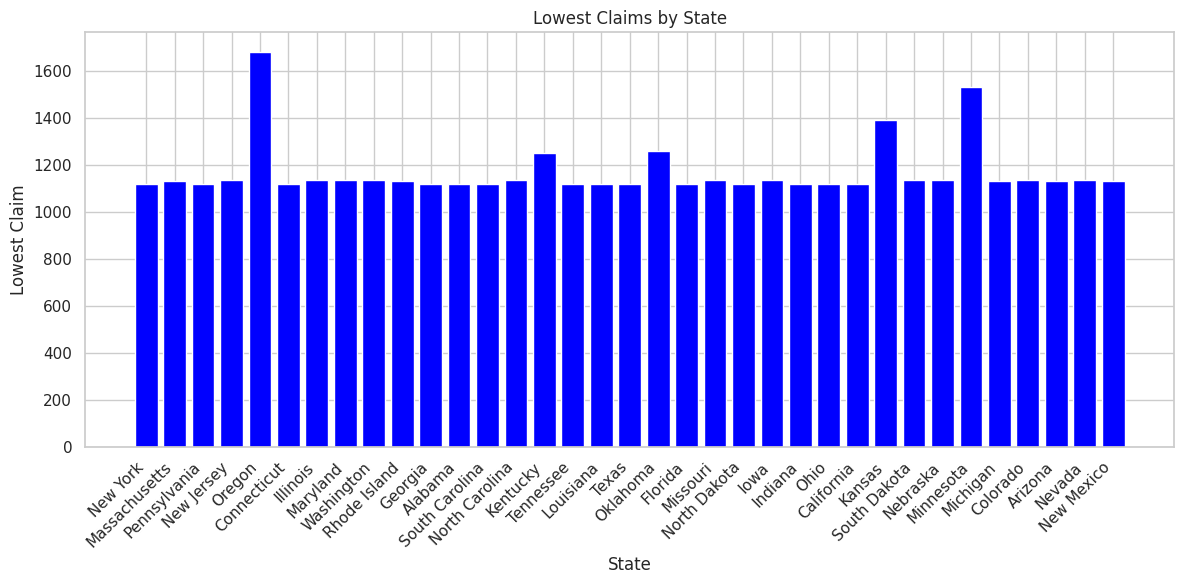

In [ ]:
# Reduce by key to find the minimum claim for each job title
min_claim_by_state = state_claim_pairs.reduceByKey(lambda a, b: min(a, b))

# Filter out the results to keep only the lowest claims
filtered_min_claims = min_claim_by_state.filter(lambda x: x[1] > 0)

# Collect and print the result
result = filtered_min_claims.collect()

# Plot the result
# Extract job titles and claims from the result
state, claims = zip(*result)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(state, claims, color='blue')
plt.xlabel('State')
plt.ylabel('Lowest Claim')
plt.title('Lowest Claims by State')
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.tight_layout()

# Show the plot
plt.show()

From the lowest claim by states, most of states have similar lowest claims around 1100.

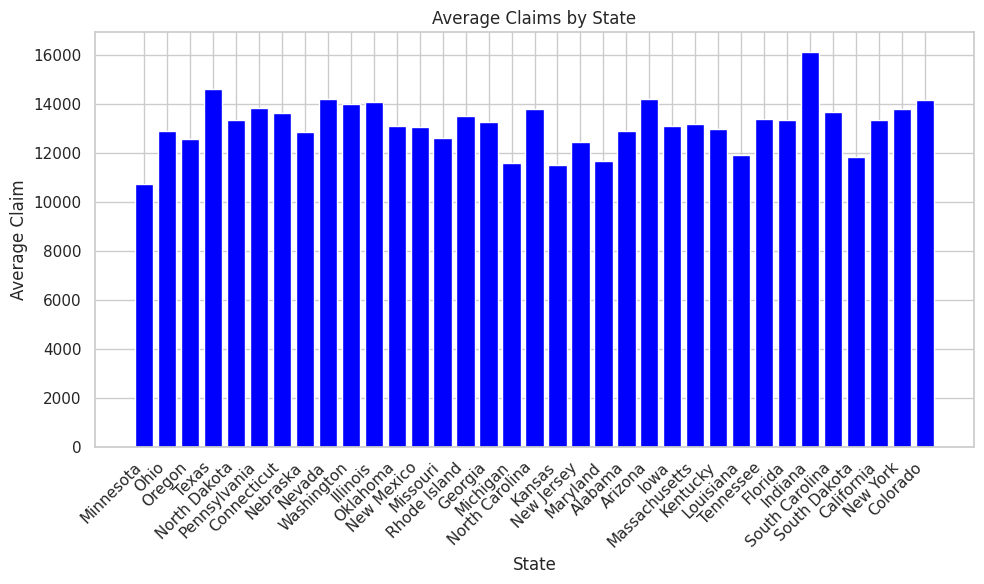

In [ ]:
# Calculate average claims by job title
avg_claims_by_state = data_pyspark.groupBy("state").agg({"claim": "avg"})

# Convert the PySpark DataFrame to a pandas DataFrame
avg_claims_df = avg_claims_by_state.toPandas()

# Extract job titles and average claims from the pandas DataFrame
state = avg_claims_df["state"]
average_claims = avg_claims_df["avg(claim)"]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(state, average_claims, color='blue')
plt.xlabel('State')
plt.ylabel('Average Claim')
plt.title('Average Claims by State')
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.tight_layout()

# Show the plot
plt.show()

From the average claim for different states, the avarage value of claims differs from each other for different states. Indiana has an average state of 16000, and Minnesota has an average claim around 11000

## Apply Association rules

In [ ]:
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,state
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72.0,0,0,Actor,13112.6,New York
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78.0,1,1,Engineer,9567.0,Massachusetts
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88.0,1,1,Academician,32734.2,Pennsylvania
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72.0,1,0,Chef,48517.6,Pennsylvania
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82.0,1,0,HomeMakers,1731.7,New York


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load your dataset (replace with your actual dataset)
data_association_rule = data[data['hereditary_diseases'] != "NoDisease"][['sex', 'job_title', 'state', 'hereditary_diseases']]
# Preprocess data and one-hot encode categorical variables
# For example:
data_association_rule = pd.get_dummies(data_association_rule, columns=['sex', 'job_title', 'state', 'hereditary_diseases'])

# Perform frequent itemset mining
frequent_itemsets = apriori(data_association_rule, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] >= 3]

# Generate association rules
# rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1, support_only=True)

# Display the association rules
print(frequent_itemsets)
print("------------------")
# print(rules)

      support                                           itemsets  length
212  0.015968  (sex_female, job_title_Buisnessman, hereditary...       3
213  0.010978  (hereditary_diseases_HeartDisease, sex_female,...       3
214  0.011976  (hereditary_diseases_Obesity, sex_female, job_...       3
215  0.012974  (hereditary_diseases_Arthritis, sex_female, jo...       3
216  0.011976  (sex_female, hereditary_diseases_Diabetes, job...       3
217  0.010978  (job_title_DefencePersonnels, sex_female, here...       3
218  0.013972  (sex_female, job_title_FilmMaker, hereditary_d...       3
219  0.011976  (sex_female, job_title_HomeMakers, hereditary_...       3
220  0.011976  (hereditary_diseases_Obesity, sex_female, job_...       3
221  0.012974  (job_title_ITProfessional, sex_female, heredit...       3
222  0.010978  (job_title_ITProfessional, sex_female, heredit...       3
223  0.011976  (sex_female, job_title_Journalist, hereditary_...       3
224  0.012974  (sex_female, hereditary_diseases_Epi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## Apply Regression Models

In [ ]:
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,state
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72.0,0,0,Actor,13112.6,New York
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78.0,1,1,Engineer,9567.0,Massachusetts
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88.0,1,1,Academician,32734.2,Pennsylvania
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72.0,1,0,Chef,48517.6,Pennsylvania
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82.0,1,0,HomeMakers,1731.7,New York


In [ ]:
data_regression = data[['age', 'bmi', 'hereditary_diseases', 'smoker', 'bloodpressure', 'job_title', 'claim']]
data_regression['hereditary_diseases'] = np.where(data_regression['hereditary_diseases'] == 'NoDisease', 0, 1)
data_regression

,age,bmi,hereditary_diseases,smoker,bloodpressure,job_title,claim
0,60.0,24.3,0,0,72.0,Actor,13112.6
1,49.0,22.6,0,0,78.0,Engineer,9567.0
2,32.0,17.8,1,1,88.0,Academician,32734.2
3,61.0,36.4,0,1,72.0,Chef,48517.6
4,19.0,20.6,0,0,82.0,HomeMakers,1731.7
...,...,...,...,...,...,...,...
14995,39.0,28.3,0,1,54.0,FilmMaker,21082.2
14996,39.0,29.6,0,0,64.0,Student,7512.3
14997,20.0,33.3,0,0,52.0,FashionDesigner,1391.5
14998,52.0,36.7,0,0,70.0,Farmer,9144.6


In [ ]:
data_regression = pd.get_dummies(data_regression, columns=['hereditary_diseases', 'smoker', 'job_title'])
data_regression

,age,bmi,bloodpressure,claim,hereditary_diseases_0,hereditary_diseases_1,smoker_0,smoker_1,job_title_Academician,job_title_Accountant,...,job_title_Journalist,job_title_Labourer,job_title_Lawyer,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician
0,60.0,24.3,72.0,13112.6,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49.0,22.6,78.0,9567.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32.0,17.8,88.0,32734.2,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,61.0,36.4,72.0,48517.6,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,19.0,20.6,82.0,1731.7,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,28.3,54.0,21082.2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,39.0,29.6,64.0,7512.3,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14997,20.0,33.3,52.0,1391.5,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,52.0,36.7,70.0,9144.6,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = data_regression['claim']

# Dropping the target column from the DataFrame to create X_train
X= data_regression.drop('claim', axis=1)

### Apply Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 3889.6585499999997
R-squared: 0.7544411812901055


### Apply Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load and preprocess your dataset (X_train, y_train, X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(15000, 42)

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(42, input_dim=42, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 42)                1806      
                                                                 
 dense_31 (Dense)            (None, 10)                430       
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2247 (8.78 KB)
Trainable params: 2247 (8.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.05),loss='mean_absolute_error')

In [ ]:
epochs_hist = model.fit(X_train,y_train,epochs=100,batch_size=40,verbose=1,validation_split=0.2)

Epoch 1/100
240/240 [==============================] - 4s 11ms/step - loss: 7205.0098 - val_loss: 5359.5811
Epoch 2/100
240/240 [==============================] - 2s 6ms/step - loss: 3690.8384 - val_loss: 3102.9697
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 3168.8813 - val_loss: 3397.8972
Epoch 4/100
240/240 [==============================] - 1s 6ms/step - loss: 3136.6550 - val_loss: 2896.7380
Epoch 5/100
240/240 [==============================] - 1s 6ms/step - loss: 3067.2546 - val_loss: 2868.4907
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 3052.2974 - val_loss: 2911.8069
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 3010.8621 - val_loss: 2805.2839
Epoch 8/100
240/240 [==============================] - 1s 4ms/step - loss: 2972.8687 - val_loss: 3786.1917
Epoch 9/100
240/240 [==============================] - 1s 3ms/step - loss: 2980.0447 - val_loss: 2760.0540
Epoch 10/100
240/240 [==============

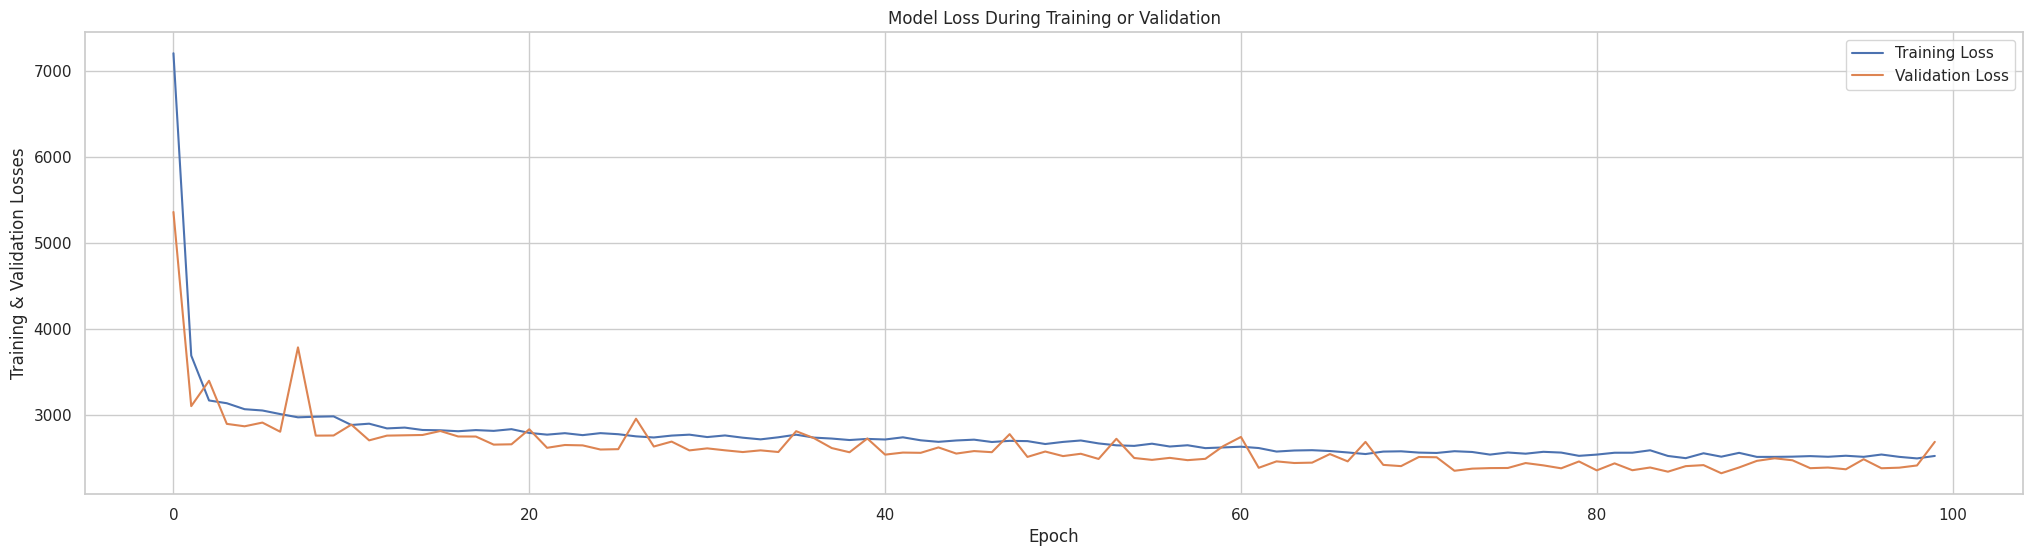

In [ ]:
plt.figure(figsize=(25, 6))
plt.plot(epochs_hist.history["loss"])
plt.plot(epochs_hist.history["val_loss"])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("MAE:", mae)
print("R2 Score:", r2)

94/94 [==============================] - 0s 2ms/step
MAE: 2845.9001326985676
R2 Score: 0.7909029017185653


### Apply Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply Random Forest
from sklearn.ensemble import RandomForestRegressor as rfr
Rfr = rfr(n_estimators = 100, criterion = 'friedman_mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(X_train,y_train)

# Make predictions on the testing set
y_pred = Rfr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 496.85077854681697
R-squared: 0.9528217017268572


Conclusion:


1.   Linear Regression:

    Mean Absolute Error: 3889.6585499999997

    R-squared: 0.7544411812901055

2.   Neural Network:
    
    MAE: 2845.9001326985676

    R2 Score: 0.7909029017185653
3. Random Forrest:

    Mean Absolute Error: 496.85077854681697
    
    R-squared: 0.9528217017268572


From the scores calculated for each model, Random Forest gives the best performance as mean sqaured error of 496.85 and R-squared 0.95